In [ ]:
# setup
library("readxl")
library("dplyr")
library("tidyr")
library("tibble")
library("PCAtools")
library("viridis")

In [2]:
# colnames might be somehow extrated from here
readLines("test_data/metasub_urban/output/motus-profiler/mOTU_taxonomic_profile/merged_profile.txt")[2]

[1] "# call: python /lustre/scratch126/casm/team268im/dh24/conda/envs/motus-profiler/bin/../share/motus-2.5.1//motus merge -i metasub_urban_1/taxonomic_profile.txt,metasub_urban_2/taxonomic_profile.txt,metasub_urban_3/taxonomic_profile.txt -o merged_profile.txt"

In [3]:
# load the data
otu <- read.csv("test_data/metasub_urban/output/motus-profiler/mOTU_taxonomic_profile/merged_profile.txt",
         sep="\t", skip=2, col.names = c("Species", "metasub_urban_1", "metasub_urban_2", "metasub_urban_3"))
metadata <- read.csv("test_data/metasub_urban/input/metasub_urban.csv") %>%
    column_to_rownames(var = "sample_name")

# match the rows in meta to cols in otu (needed for PCA)
metadata <- metadata[match(colnames(otu[,-1]), rownames(metadata)),]

# Barplot
~ ~ ~

# PCA

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


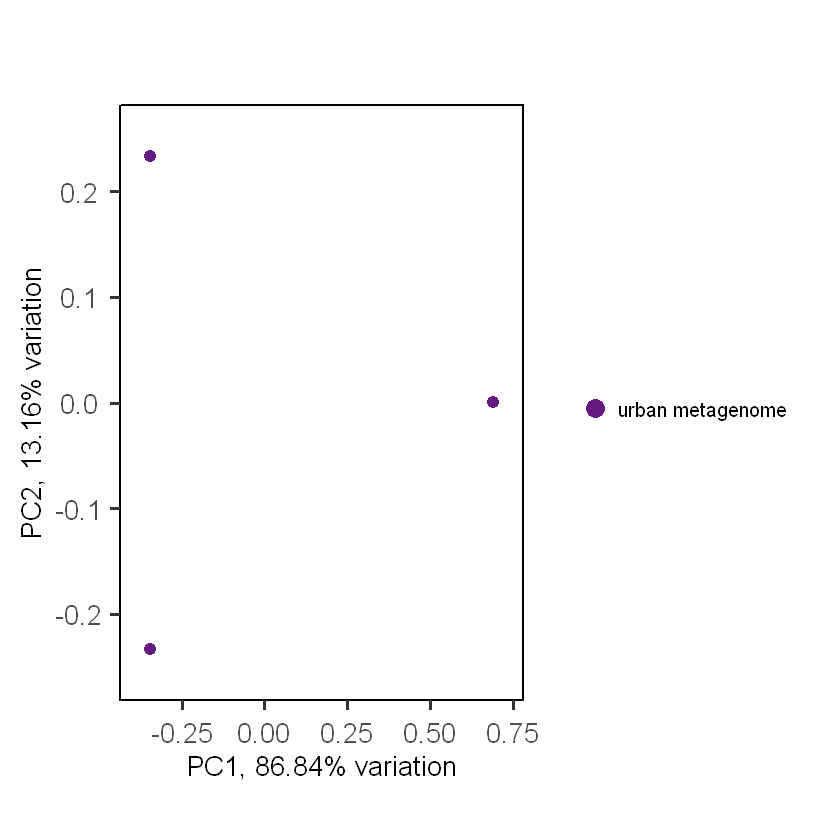

In [9]:
pca<- pca(otu[,-1], metadata=metadata) # ? , removeVar=0.1
biplot(pca, colby="scientific.name", legendPosition = "right", lab=NULL,
       gridlines.major = FALSE, gridlines.minor = FALSE, colLegendTitle = NULL,
       colkey = magma(n = n_distinct(metadata), begin = 0.3))

# Heatmap

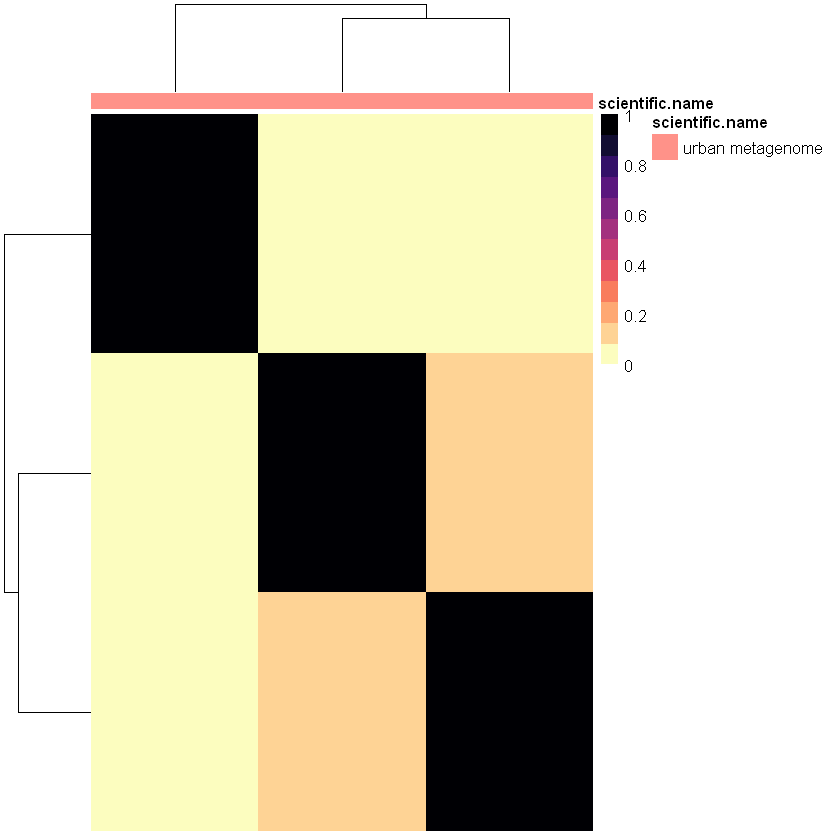

In [10]:
library(pheatmap)
corr_matrix <- cor(otu[,-1])

pheatmap(corr_matrix,annotation=metadata[][3],
         show_colnames = FALSE, show_rownames = FALSE,
         color = magma(12, direction=-1), annotation_colors = viridis(n=0), border_color = NA
        )